## skip-gram모델 구현

In [1]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None


### 학습 코드 구현

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 26 |

| 에폭 439 |  반복 1 / 2 | 시간 0[s] | 손실 2.03
| 에폭 440 |  반복 1 / 2 | 시간 0[s] | 손실 2.27
| 에폭 441 |  반복 1 / 2 | 시간 0[s] | 손실 1.85
| 에폭 442 |  반복 1 / 2 | 시간 0[s] | 손실 2.27
| 에폭 443 |  반복 1 / 2 | 시간 0[s] | 손실 2.06
| 에폭 444 |  반복 1 / 2 | 시간 0[s] | 손실 2.06
| 에폭 445 |  반복 1 / 2 | 시간 0[s] | 손실 2.06
| 에폭 446 |  반복 1 / 2 | 시간 0[s] | 손실 2.09
| 에폭 447 |  반복 1 / 2 | 시간 0[s] | 손실 1.81
| 에폭 448 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 449 |  반복 1 / 2 | 시간 0[s] | 손실 2.02
| 에폭 450 |  반복 1 / 2 | 시간 0[s] | 손실 2.09
| 에폭 451 |  반복 1 / 2 | 시간 0[s] | 손실 2.02
| 에폭 452 |  반복 1 / 2 | 시간 0[s] | 손실 1.87
| 에폭 453 |  반복 1 / 2 | 시간 0[s] | 손실 2.05
| 에폭 454 |  반복 1 / 2 | 시간 0[s] | 손실 2.23
| 에폭 455 |  반복 1 / 2 | 시간 0[s] | 손실 2.05
| 에폭 456 |  반복 1 / 2 | 시간 0[s] | 손실 1.86
| 에폭 457 |  반복 1 / 2 | 시간 0[s] | 손실 2.23
| 에폭 458 |  반복 1 / 2 | 시간 0[s] | 손실 2.26
| 에폭 459 |  반복 1 / 2 | 시간 0[s] | 손실 1.83
| 에폭 460 |  반복 1 / 2 | 시간 0[s] | 손실 2.04
| 에폭 461 |  반복 1 / 2 | 시간 0[s] | 손실 2.03
| 에폭 462 |  반복 1 / 2 | 시간 0[s] | 손실 2.04
| 에폭 463 |  반복 1

| 에폭 880 |  반복 1 / 2 | 시간 0[s] | 손실 1.89
| 에폭 881 |  반복 1 / 2 | 시간 0[s] | 손실 1.89
| 에폭 882 |  반복 1 / 2 | 시간 0[s] | 손실 2.12
| 에폭 883 |  반복 1 / 2 | 시간 0[s] | 손실 1.66
| 에폭 884 |  반복 1 / 2 | 시간 0[s] | 손실 1.89
| 에폭 885 |  반복 1 / 2 | 시간 0[s] | 손실 1.88
| 에폭 886 |  반복 1 / 2 | 시간 0[s] | 손실 1.66
| 에폭 887 |  반복 1 / 2 | 시간 0[s] | 손실 1.89
| 에폭 888 |  반복 1 / 2 | 시간 0[s] | 손실 2.34
| 에폭 889 |  반복 1 / 2 | 시간 0[s] | 손실 1.66
| 에폭 890 |  반복 1 / 2 | 시간 0[s] | 손실 2.12
| 에폭 891 |  반복 1 / 2 | 시간 0[s] | 손실 1.65
| 에폭 892 |  반복 1 / 2 | 시간 0[s] | 손실 1.89
| 에폭 893 |  반복 1 / 2 | 시간 0[s] | 손실 1.67
| 에폭 894 |  반복 1 / 2 | 시간 0[s] | 손실 2.11
| 에폭 895 |  반복 1 / 2 | 시간 0[s] | 손실 1.67
| 에폭 896 |  반복 1 / 2 | 시간 0[s] | 손실 2.33
| 에폭 897 |  반복 1 / 2 | 시간 0[s] | 손실 1.44
| 에폭 898 |  반복 1 / 2 | 시간 0[s] | 손실 2.11
| 에폭 899 |  반복 1 / 2 | 시간 0[s] | 손실 2.11
| 에폭 900 |  반복 1 / 2 | 시간 0[s] | 손실 1.44
| 에폭 901 |  반복 1 / 2 | 시간 0[s] | 손실 2.10
| 에폭 902 |  반복 1 / 2 | 시간 0[s] | 손실 1.66
| 에폭 903 |  반복 1 / 2 | 시간 0[s] | 손실 2.12
| 에폭 904 |  반복 1

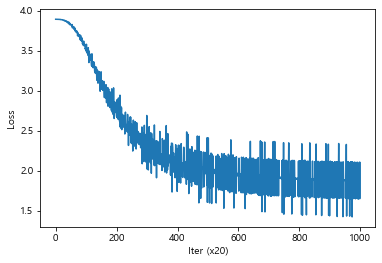

you [ 0.00543527 -0.00088098 -0.01024747  0.00534034  0.00030415]
say [-0.9222978  -1.1822573   0.04933272  0.87477833  0.86797637]
goodbye [ 0.8297518   0.83221596  1.288184   -0.8370143  -0.8244524 ]
and [-1.0446235  1.3907075  0.9642941  1.0667417  1.0225238]
i [ 0.8347777   0.8381892   1.2839845  -0.84180987 -0.8025348 ]
hello [ 0.8306936  0.8229919 -1.287932  -0.8024604 -0.8988046]
. [-0.00755208 -0.02016358 -0.00708449 -0.00661431 -0.00620386]


In [2]:
import sys
sys.path.append('..')  
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])